<a href="https://colab.research.google.com/github/evan-placenis/Computer-Vision/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
5#Convolutional Neural Networks

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-21 18:14:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.8MB/s    in 5.6s    

2023-06-21 18:14:10 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



['pizza' 'steak']
Image shape : (512, 512, 3)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 65,  35,  24],
        [ 69,  39,  29],
        [ 71,  41,  31],
        ...,
        [178, 115,  44],
        [179, 119,  46],
        [182, 122,  49]],

       [[ 60,  30,  19],
        [ 61,  31,  21],
        [ 60,  30,  20],
        ...,
        [179, 116,  45],
        [182, 122,  50],
        [186, 126,  53]],

       [[ 64,  34,  23],
        [ 63,  33,  22],
        [ 63,  33,  23],
        ...,
        [178, 118,  48],
        [181, 121,  51],
        [184, 124,  52]],

       ...,

       [[116,  59,  30],
        [129,  73,  46],
        [116,  60,  33],
        ...,
        [ 50,  22,  11],
        [ 43,  15,   4],
        [ 49,  21,  10]],

       [[145,  88,  59],
        [160, 104,  77],
        [144,  88,  61],
        ...,
        [ 41,  13,   2],
        [ 42,  14,   3],
        [ 61,  33,  22]],

       [[125,  68,  39],
        [152,  96,  69],
        [148,  92,  65],
        ...,
        [ 46,  18,   

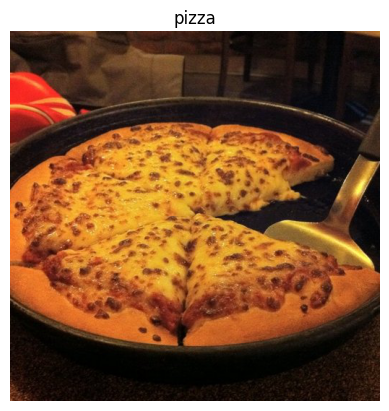

In [2]:
import os

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape : {img.shape}")
  return img

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")
tf.constant(img)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

In [4]:

#building CNN to find patterns in images
#load image
#preprocess image
#build, compile, fit CNN

#preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to data directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test" #dont need the content part

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                            batch_size = 32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode= "binary",
                                               seed = 42)


#READ THIS:
#CNN explainer

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [5]:
#build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile a CNN
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit model

model_1.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 29s 357ms/step - loss: 0.6135 - accuracy: 0.6640 - val_loss: 0.4487 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4526 - accuracy: 0.8000 - val_loss: 0.3710 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4367 - accuracy: 0.7980 - val_loss: 0.3629 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 15s 316ms/step - loss: 0.3752 - accuracy: 0.8467 - val_loss: 0.3323 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3681 - accuracy: 0.8407 - val_loss: 0.3268 - val_accuracy: 0.8680


In [7]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (24,24, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [9]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 237ms/step - loss: 0.5902 - accuracy: 0.6880 - val_loss: 0.4533 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4785 - accuracy: 0.7827 - val_loss: 0.3960 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4364 - accuracy: 0.8027 - val_loss: 0.3804 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4077 - accuracy: 0.8273 - val_loss: 0.3613 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3899 - accuracy: 0.8293 - val_loss: 0.3527 - val_accuracy: 0.8480


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
showing image number: 22


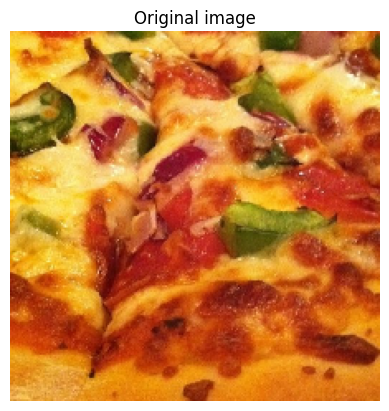

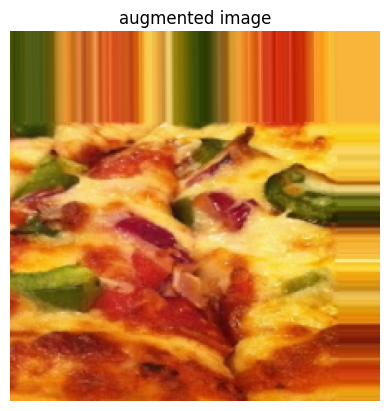

In [10]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# create ImageDataGenerator without data augmentation
train_data_gen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

#data augmentation is the process of altering our training data, leading it tot have more diversity and in turn
#allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image,
#flipping it,  cropping it or someting similar.

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle = False)
train_data= train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle = False)
test_data = test_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary")

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
#visualizing
import random
random_number = random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False);

In [11]:
#augmented data CNN model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 675ms/step - loss: 0.7340 - accuracy: 0.4520 - val_loss: 0.6774 - val_accuracy: 0.6733
Epoch 2/5
47/47 [==============================] - 30s 634ms/step - loss: 0.6807 - accuracy: 0.5700 - val_loss: 0.6423 - val_accuracy: 0.6247
Epoch 3/5
47/47 [==============================] - 31s 662ms/step - loss: 0.6272 - accuracy: 0.6873 - val_loss: 0.8770 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 33s 706ms/step - loss: 0.6987 - accuracy: 0.5827 - val_loss: 0.6520 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 30s 632ms/step - loss: 0.6961 - accuracy: 0.5853 - val_loss: 0.6568 - val_accuracy: 0.5667


In [12]:

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

#create function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size = [img_shape,img_shape])
  img = img/255.
  return img

steak = load_and_prep_image("03-steak.jpeg")
steak

#pred = model_6.predict(tf.expand_dims(steak, axis = 0))

--2023-06-21 18:21:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2023-06-21 18:21:45 (70.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [13]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
##pred_class = class_names[int(tf.round(pred))]
#pred_class

def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 243ms/step


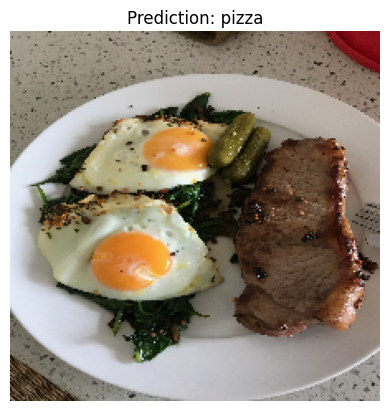

In [14]:
pred_and_plot(model_6, "03-steak.jpeg")

In [15]:
#Multi class Image Classification

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

import os




--2023-06-21 18:21:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 24s     

2023-06-21 18:22:11 (20.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [16]:
#set up train and test dir
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape : (512, 512, 3)


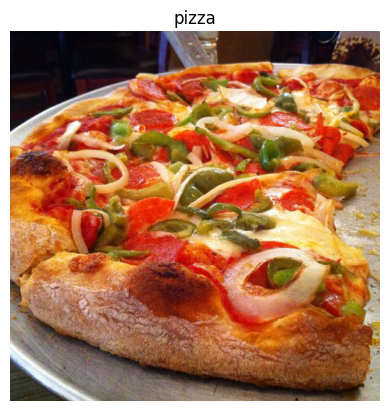

In [17]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [18]:
#pre process data into tensors

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#load data in from directories and turn into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),#change size of images to 224 by 224
                                               batch_size = 32,
                                               class_mode = "categorical") #bc we have 10 different classes of images
test_data = test_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
#create baseline model
model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224,224,3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")#change to use softmax for more than 2 classes (not binary)
])

model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [20]:
history_8 = model_8.fit(train_data, #10 different classses
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 81s 335ms/step - loss: 2.2271 - accuracy: 0.1669 - val_loss: 2.0786 - val_accuracy: 0.2639
Epoch 2/5
235/235 [==============================] - 79s 336ms/step - loss: 1.9990 - accuracy: 0.3027 - val_loss: 1.7384 - val_accuracy: 0.4171
Epoch 3/5
235/235 [==============================] - 80s 340ms/step - loss: 1.6725 - accuracy: 0.4307 - val_loss: 1.2333 - val_accuracy: 0.6212
Epoch 4/5
235/235 [==============================] - 78s 333ms/step - loss: 1.0932 - accuracy: 0.6387 - val_loss: 0.5374 - val_accuracy: 0.8607
Epoch 5/5
235/235 [==============================] - 80s 339ms/step - loss: 0.5050 - accuracy: 0.8365 - val_loss: 0.1832 - val_accuracy: 0.9645


In [21]:
#evaluate the model
model_8.evaluate(test_data)
model_8.summary()
#model is overfitte


235/235 [==============================] - 39s 165ms/step - loss: 0.1832 - accuracy: 0.9645
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)         

In [22]:
#augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size =32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [23]:
model_9 = tf.keras.models.clone_model(model_8) #clones model but does not compile or fit it
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_9 = model_9.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 161s 676ms/step - loss: 2.1870 - accuracy: 0.1967 - val_loss: 2.0329 - val_accuracy: 0.2765
Epoch 2/5
235/235 [==============================] - 158s 667ms/step - loss: 2.0562 - accuracy: 0.2680 - val_loss: 1.9414 - val_accuracy: 0.3139
Epoch 3/5
235/235 [==============================] - 155s 658ms/step - loss: 2.0038 - accuracy: 0.2939 - val_loss: 1.8928 - val_accuracy: 0.3565
Epoch 4/5
235/235 [==============================] - 154s 656ms/step - loss: 1.9673 - accuracy: 0.3241 - val_loss: 1.8439 - val_accuracy: 0.3713
Epoch 5/5
235/235 [==============================] - 154s 656ms/step - loss: 1.9302 - accuracy: 0.3337 - val_loss: 1.8231 - val_accuracy: 0.3841


In [24]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-06-21 18:43:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-06-21 18:43:35 (269 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-06-21 18:43:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [25]:
list(class_names)
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))

  #add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 210ms/step


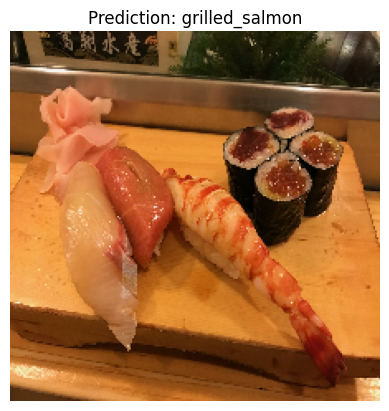

In [26]:
pred_and_plot(model=model_9,
              filename = "03-sushi.jpeg",
              class_names=class_names)

In [27]:
#saving a model
model_9.save("saved_trained_model_10")

#load in a trained model and evaluate it

loaded_model_9 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_9.evaluate(test_data)

235/235 [==============================] - 40s 171ms/step - loss: 1.8231 - accuracy: 0.3841


[1.8230642080307007, 0.38413333892822266]